## 1. Module Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('ggplot') # 그래프 스타일 설정

## 2. Load Data

In [3]:
# 데이터 로드
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 데이터 크기 확인
print(f"Train Data Shape: {train.shape}")
print(f"Test Data Shape: {test.shape}")

Train Data Shape: (26457, 20)
Test Data Shape: (10000, 19)


In [9]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [10]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


## 3. EDA (탐색적 데이터 분석)

In [11]:
# 결측치 확인
print("--- Train Missing Values ---")
print(train.isnull().sum())

# 데이터 타입 및 정보 확인
train.info()

--- Train Missing Values ---
index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type

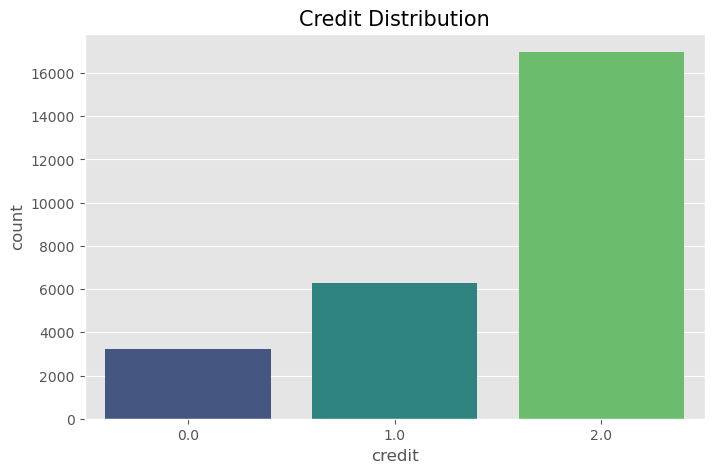

credit
2.0    0.641343
1.0    0.236875
0.0    0.121783
Name: proportion, dtype: float64


In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x='credit', data=train, palette='viridis')
plt.title('Credit Distribution', fontsize=15)
plt.show()

# 비율 확인
print(train['credit'].value_counts(normalize=True))

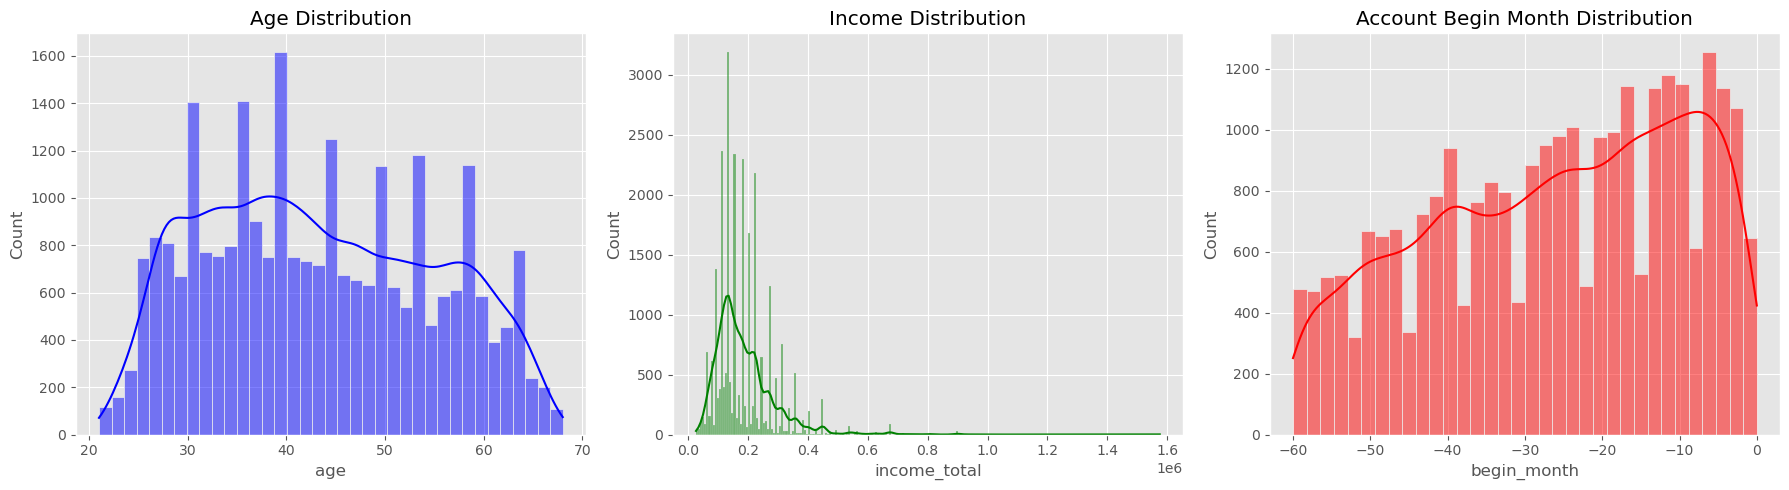

In [13]:
# 음수값 변환 및 새로운 파생 변수 생성
train['age'] = -train['DAYS_BIRTH'] // 365
train['years_employed'] = -train['DAYS_EMPLOYED'] // 365
train.loc[train['years_employed'] < 0, 'years_employed'] = 0 # 퇴직자/무직자 처리

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(train['age'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Age Distribution')

sns.histplot(train['income_total'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Income Distribution')

sns.histplot(train['begin_month'], kde=True, ax=axes[2], color='red')
axes[2].set_title('Account Begin Month Distribution')

plt.tight_layout()
plt.show()

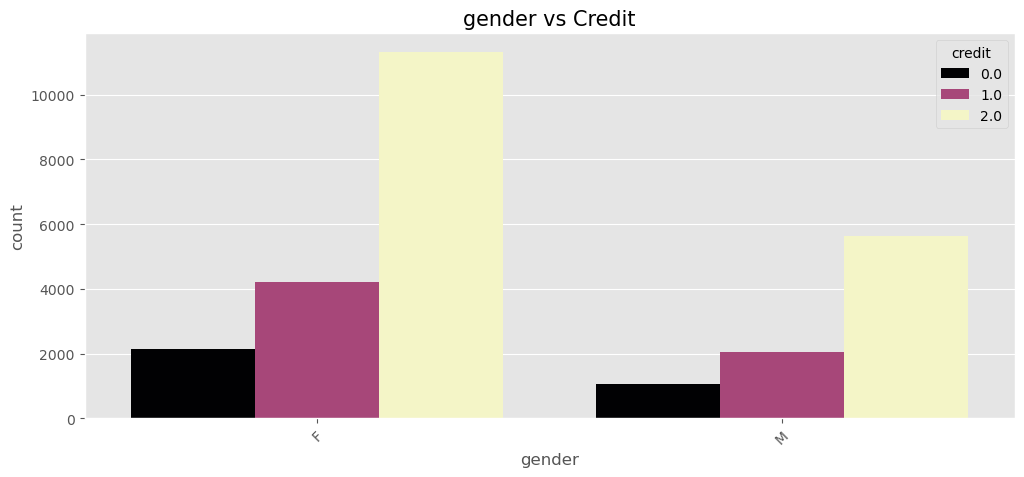

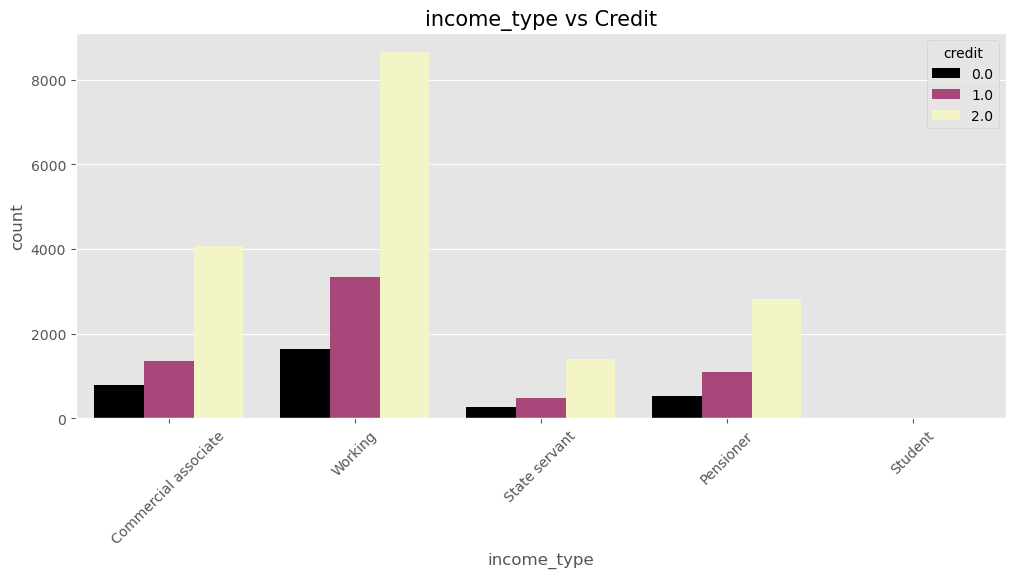

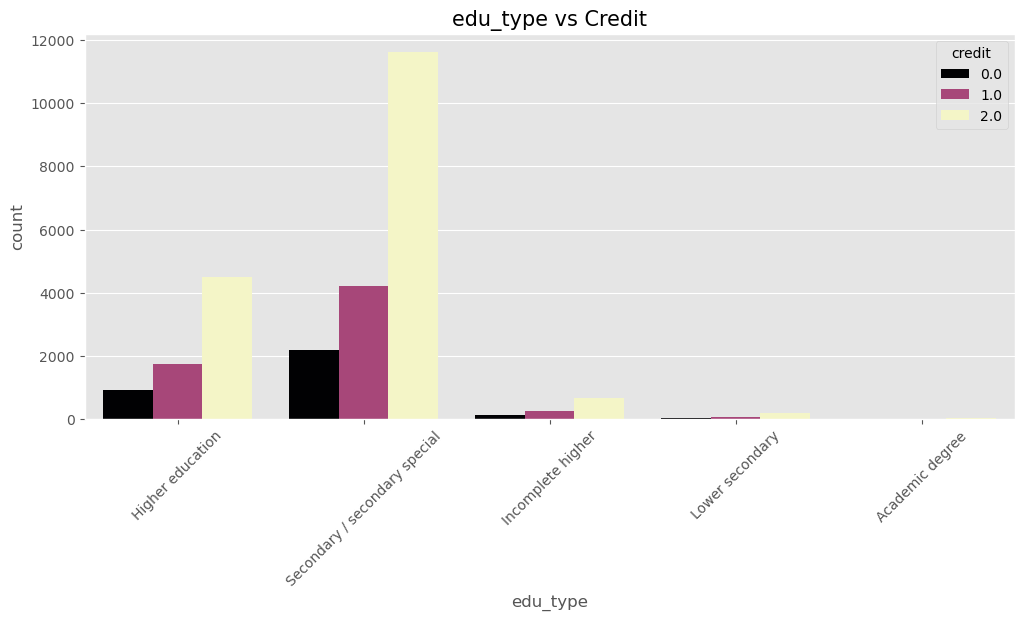

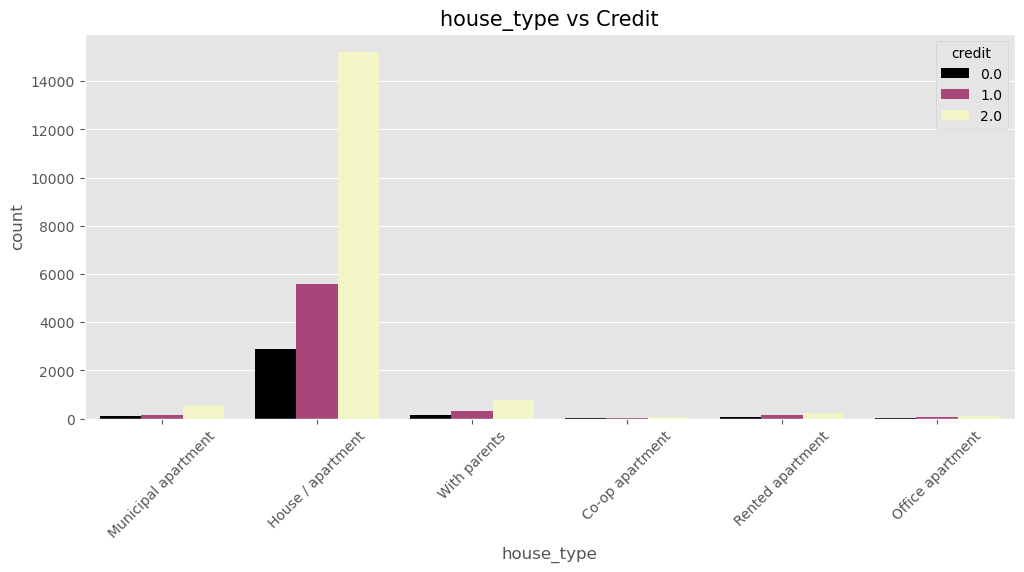

In [14]:
def plot_categorical(column):
    plt.figure(figsize=(12, 5))
    sns.countplot(x=column, hue='credit', data=train, palette='magma')
    plt.title(f'{column} vs Credit', fontsize=15)
    plt.xticks(rotation=45)
    plt.show()

# 주요 변수들 확인
cat_cols = ['gender', 'income_type', 'edu_type', 'house_type']
for col in cat_cols:
    plot_categorical(col)

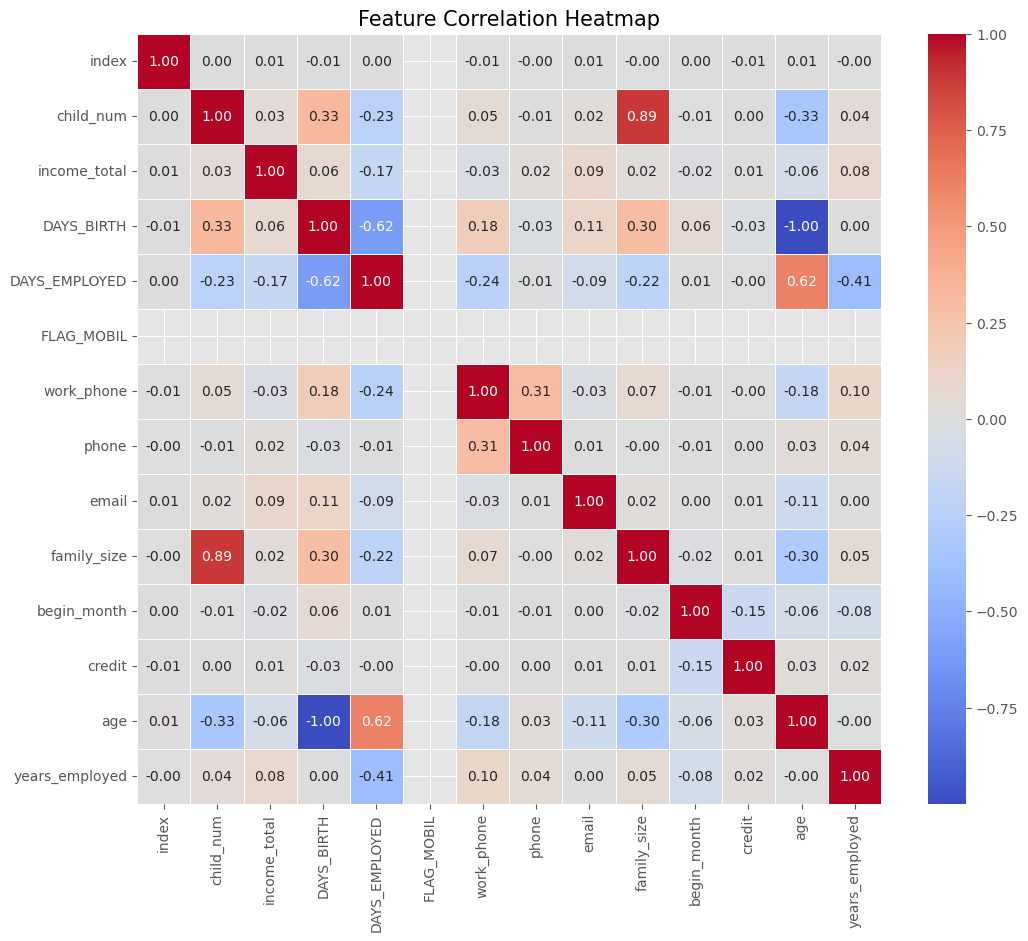

In [15]:
plt.figure(figsize=(12, 10))
# 수치형 컬럼만 추출하여 상관계수 계산
numeric_train = train.select_dtypes(include=[np.number])
sns.heatmap(numeric_train.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=15)
plt.show()

## 4. Data Preprocessing (데이터 전처리)

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 데이터 로드
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 1. 분석에 의미 없는 컬럼 삭제
train.drop(['index', 'FLAG_MOBIL'], axis=1, inplace=True)
test.drop(['index', 'FLAG_MOBIL'], axis=1, inplace=True)

# 2. 결측치(NaN) 처리
train['occyp_type'] = train['occyp_type'].fillna('Unknown')
test['occyp_type'] = test['occyp_type'].fillna('Unknown')

In [17]:
# 3. DAYS_EMPLOYED 이상치 처리
# 양수값은 무직자이므로 0으로 바꾸고 별도의 플래그(unemployed_flag) 생성
train['unemployed_flag'] = train['DAYS_EMPLOYED'].apply(lambda x: 1 if x > 0 else 0)
test['unemployed_flag'] = test['DAYS_EMPLOYED'].apply(lambda x: 1 if x > 0 else 0)

train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].apply(lambda x: 0 if x > 0 else x)
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].apply(lambda x: 0 if x > 0 else x)

# 4. 날짜 데이터 절대값 변환 (음수 -> 양수)
d_cols = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']
for col in d_cols:
    train[col] = train[col].abs()
    test[col] = test[col].abs()

In [18]:
# 5. 이진 변수 인코딩 (Binary Encoding)
train['gender'] = train['gender'].replace(['F','M'], [0, 1])
test['gender'] = test['gender'].replace(['F','M'], [0, 1])

train['car'] = train['car'].replace(['N','Y'], [0, 1])
test['car'] = test['car'].replace(['N','Y'], [0, 1])

train['reality'] = train['reality'].replace(['N','Y'], [0, 1])
test['reality'] = test['reality'].replace(['N','Y'], [0, 1])

# 6. 다중 범주 변수 인코딩 (Label Encoding)
cat_cols = ['income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type']
for col in cat_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col]) # train의 기준으로 test도 변환

In [19]:
# 7. 소득 데이터 로그 변환
train['income_total'] = np.log1p(train['income_total'])
test['income_total'] = np.log1p(test['income_total'])

print("전처리 완료!")
train.head()

전처리 완료!


,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,unemployed_flag
0,0,0,0,0,12.218500,0,1,1,2,13899,4709,0,0,0,17,2.0,6.0,1.0,0
1,0,0,1,1,12.419170,0,4,0,1,11380,1540,0,0,1,8,3.0,5.0,1.0,0
2,1,1,1,0,13.017005,4,1,1,1,19087,4434,0,1,0,10,2.0,22.0,2.0,0
3,0,0,1,0,12.218500,0,4,1,1,15088,2092,0,1,0,14,2.0,37.0,0.0,0
4,0,1,1,0,11.967187,2,1,1,1,15037,2105,0,0,0,10,2.0,26.0,2.0,0


## 5. Model Train (모델 학습)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# 1. 학습 데이터 준비
X = train.drop('credit', axis=1)
y = train['credit']

# 2. 데이터 분할 (학습 80%, 검증 20%)
# stratify=y를 통해 클래스 비율을 유지하며 나눕니다.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Random Forest 모델 정의 및 학습
# n_estimators: 결정 트리의 개수 (가볍게 100개로 설정)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 4. 검증 데이터로 성능 평가 (Log Loss)
# predict_proba를 사용하여 각 클래스(0, 1, 2)에 속할 확률을 예측합니다.
val_probs = rf_model.predict_proba(X_val)
loss = log_loss(y_val, val_probs)

print(f"Validation Log Loss: {loss:.4f}")

Validation Log Loss: 0.9538


In [21]:
# 5. 테스트 데이터 예측 (확률값)
test_probs = rf_model.predict_proba(test)

# 6. 제출 파일 양식에 맞게 데이터프레임 생성
# sample_submission의 index를 그대로 사용합니다.
submission = pd.DataFrame(test_probs, columns=['0', '1', '2'])
submission['index'] = pd.read_csv('sample_submission.csv')['index']

# 컬럼 순서 조정
submission = submission[['index', '0', '1', '2']]

# 결과 저장
submission.to_csv('submission_rf_basic.csv', index=False)
print("제출 파일 'submission_rf_basic.csv'가 생성되었습니다!")

제출 파일 'submission_rf_basic.csv'가 생성되었습니다!
